In [1]:
from scripts import optimization, model, visualizations
import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
import pickle
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
#Parameters

weights_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/setup2/weights.npy'
input_weights_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/setup2/input_weights.npy'
place_obs_path = '/hpc/mzhu843/modelling/nest/DATA/processed/spikes/small_con_S_5_p.npy'
spikes_obs_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/setup2/small_spikes_obs.npy'
results_dir = '/hpc/mzhu843/modelling/nest/results/optimisation/setup_2/'

move_params = {
                'weights_range': [(-30, 30), (-20, 20), (-10, 10)],
                'weights_change_range': [(-3, 3)],
                'optimise_input_weights': [False]
            }
lamb = 0

biological = True

optimisation_steps = 2000

cost_type = 'boundary'

resolution = 1
runtime = 35000

weights = np.load(weights_path)
input_weights = np.load(input_weights_path)
small_categorized_neurons_path = '/hpc/mzhu843/modelling/nest/DATA/processed/model2/small_categorised_neurons_5.pkl'
save_results = True
save_calcium = False

In [3]:
place_obs = np.load(place_obs_path)[:, 11701:12701]

spikes_obs = np.load(spikes_obs_path)[:,11701:12701]


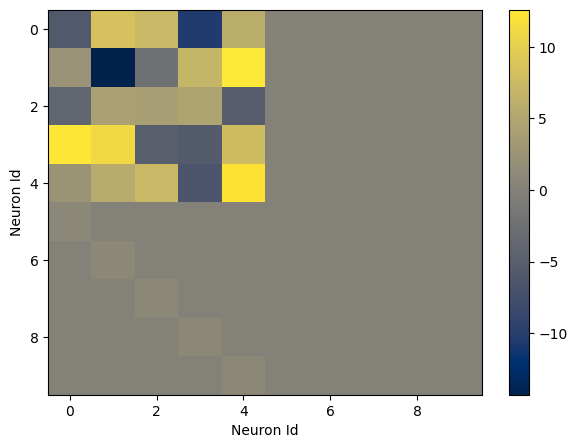

In [4]:
visualizations.plot_matrix(weights)

In [5]:
with open(small_categorized_neurons_path, 'rb') as file:
    small_categorized_neurons = pickle.load(file)

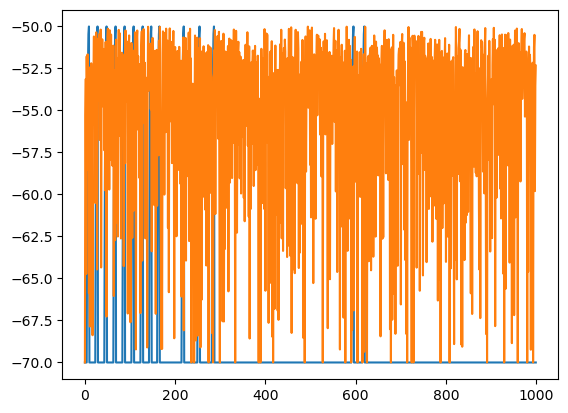

In [6]:
network = model.Model2(small_categorized_neurons, weights, input_weights, runtime=runtime, resolution=1)

network.simulate()

plt.plot(place_obs[0])
plt.plot(network.get_voltage_traces()[0][::33][:len(place_obs[0])])

plt.show()

In [7]:
problem = optimization.SimulatedAnnealing2(weights, place_obs, spikes_obs, lamb, small_categorized_neurons, input_weights, move_params, cost_type=cost_type, runtime=runtime, biological=biological, resolution=1)
problem.steps = optimisation_steps

In [8]:
sensitivity_analysis = optimization.SensitivityAnalysis2(move_params, problem, ['weights_range', 'weights_change_range'], weights1= weights, input_weights1=input_weights, 
                                                        save_results=save_results, save_calcium=save_calcium, results_dir=results_dir)
param_perms = sensitivity_analysis.generate_param_permutations()
results = sensitivity_analysis.run_analysis()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000     491095.97     5.00%     5.00%     0:02:20     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000     489644.62     0.00%     0.00%     0:02:25     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000     479224.80     5.00%     5.00%     0:02:30     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.74120     516987.34     0.00%     0.00%     0:02:38     0:00:02 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000     508633.61     0.00%     0.00%     0:02:45     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000     509007.70     5.00%     5.00%     0:02:49     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000     542027.66     0.00%     0.00%     0:02:59     0:00:00 Temperature 